In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
s = pd.Series([1,3,5,np.nan,6,8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [3]:
dates = pd.date_range('20130101', periods=6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [7]:
multi_dim_array = np.random.randn(6,4)
df = pd.DataFrame(multi_dim_array, index=dates, columns=list('ABCD'))
df

,A,B,C,D
2013-01-01,0.725468,0.912457,0.510000,-0.558354
2013-01-02,0.454065,-0.498633,1.379681,1.075568
2013-01-03,1.850842,0.883291,0.819883,-0.533139
2013-01-04,0.438187,0.744181,0.093405,-0.651792
2013-01-05,-0.848636,1.146669,-0.341807,-1.414238
2013-01-06,1.462742,-0.720622,0.039198,-0.681893


In [13]:
df2 = pd.DataFrame({ 
    
    # set all values to given value
    'A' : 1.,
    'B' : pd.Timestamp('20130102'),
    
    # Using a Serise Constructor(data, index=array-like, dtype=numpy.dtype)
    'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
    
    # using a numpy array
    'D' : np.array([3] * 4,dtype='int32'),
    
    # Using categories
    'E' : pd.Categorical(["test","train","test","train"]),
    'F' : 'foo' 
})
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


In [14]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

DataFrame properties
```
df2.<TAB>
df2.A                  df2.bool
df2.abs                df2.boxplot
df2.add                df2.C
df2.add_prefix         df2.clip
df2.add_suffix         df2.clip_lower
df2.align              df2.clip_upper
df2.all                df2.columns
df2.any                df2.combine
df2.append             df2.combine_first
df2.apply              df2.compound
df2.applymap           df2.consolidate
df2.D
```

In [17]:
# View the underlaying index column values
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [18]:
# Tranpose the data frame
df.T

,2013-01-01 00:00:00,2013-01-02 00:00:00,2013-01-03 00:00:00,2013-01-04 00:00:00,2013-01-05 00:00:00,2013-01-06 00:00:00
A,0.725468,0.454065,1.850842,0.438187,-0.848636,1.462742
B,0.912457,-0.498633,0.883291,0.744181,1.146669,-0.720622
C,0.510000,1.379681,0.819883,0.093405,-0.341807,0.039198
D,-0.558354,1.075568,-0.533139,-0.651792,-1.414238,-0.681893


# Sorting

In [24]:
# Sorting
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,-0.558354,0.510000,0.912457,0.725468
2013-01-02,1.075568,1.379681,-0.498633,0.454065
2013-01-03,-0.533139,0.819883,0.883291,1.850842
2013-01-04,-0.651792,0.093405,0.744181,0.438187
2013-01-05,-1.414238,-0.341807,1.146669,-0.848636
2013-01-06,-0.681893,0.039198,-0.720622,1.462742


In [33]:
# Sort by the A Column
df.sort_values(by=list('AB'))

,A,B,C,D
2013-01-05,-0.848636,1.146669,-0.341807,-1.414238
2013-01-04,0.438187,0.744181,0.093405,-0.651792
2013-01-02,0.454065,-0.498633,1.379681,1.075568
2013-01-01,0.725468,0.912457,0.510000,-0.558354
2013-01-06,1.462742,-0.720622,0.039198,-0.681893
2013-01-03,1.850842,0.883291,0.819883,-0.533139


# Reading from a DataFrame

In [34]:
# Slice by rows
df[0:3]

,A,B,C,D
2013-01-01,0.725468,0.912457,0.510000,-0.558354
2013-01-02,0.454065,-0.498633,1.379681,1.075568
2013-01-03,1.850842,0.883291,0.819883,-0.533139


In [35]:
# Select a row
first_date = dates[0]
df.loc[first_date]

A    0.725468
B    0.912457
C    0.510000
D   -0.558354
Name: 2013-01-01 00:00:00, dtype: float64

In [42]:
# eh?
df.loc[:,['A','B']]

,A,B
2013-01-01,0.725468,0.912457
2013-01-02,0.454065,-0.498633
2013-01-03,1.850842,0.883291
2013-01-04,0.438187,0.744181
2013-01-05,-0.848636,1.146669
2013-01-06,1.462742,-0.720622


In [43]:
df.loc['20130102':'20130104',['A','B']]

,A,B
2013-01-02,0.454065,-0.498633
2013-01-03,1.850842,0.883291
2013-01-04,0.438187,0.744181


In [45]:
# Boolean slicing
df[df > 0]

,A,B,C,D
2013-01-01,0.725468,0.912457,0.510000,NaN
2013-01-02,0.454065,NaN,1.379681,1.075568
2013-01-03,1.850842,0.883291,0.819883,NaN
2013-01-04,0.438187,0.744181,0.093405,NaN
2013-01-05,NaN,1.146669,NaN,NaN
2013-01-06,1.462742,NaN,0.039198,NaN


# Handling Missing Data

In [49]:
# Drop rows that contain any missing data
df.dropna(how='any')

,A,B,C,D
2013-01-01,0.725468,0.912457,0.510000,-0.558354
2013-01-02,0.454065,-0.498633,1.379681,1.075568
2013-01-03,1.850842,0.883291,0.819883,-0.533139
2013-01-04,0.438187,0.744181,0.093405,-0.651792
2013-01-05,-0.848636,1.146669,-0.341807,-1.414238
2013-01-06,1.462742,-0.720622,0.039198,-0.681893


In [51]:
# replace missing data with the given value
df.fillna(value=5)

,A,B,C,D
2013-01-01,0.725468,0.912457,0.510000,-0.558354
2013-01-02,0.454065,-0.498633,1.379681,1.075568
2013-01-03,1.850842,0.883291,0.819883,-0.533139
2013-01-04,0.438187,0.744181,0.093405,-0.651792
2013-01-05,-0.848636,1.146669,-0.341807,-1.414238
2013-01-06,1.462742,-0.720622,0.039198,-0.681893


In [54]:
# Returns a data frame with boolean values reporesenting if there was missing data or not
pd.isna(df)

,A,B,C,D
2013-01-01,False,False,False,False
2013-01-02,False,False,False,False
2013-01-03,False,False,False,False
2013-01-04,False,False,False,False
2013-01-05,False,False,False,False
2013-01-06,False,False,False,False


# Operations

In [58]:
# Histogram
s = pd.Series(np.random.randint(0, 7, size=10))
s.value_counts()

1    4
4    3
0    2
6    1
dtype: int64

In [59]:
# String Methods
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

In [60]:
# Grouping
In [91]: df = pd.DataFrame({
    'A' : ['foo', 'bar', 'foo', 'bar',
    'foo', 'bar', 'foo', 'foo'],
    'B' : ['one', 'one', 'two', 'three',
    'two', 'two', 'one', 'three'],
    'C' : np.random.randn(8),
    'D' : np.random.randn(8)
})

df

,A,B,C,D
0,foo,one,-0.663384,0.958720
1,bar,one,0.873674,0.191955
2,foo,two,-0.586916,-2.033187
3,bar,three,1.687257,-0.329174
4,foo,two,-0.259550,-0.118510
5,bar,two,-0.478421,-1.763565
6,foo,one,1.090677,1.171526
7,foo,three,0.172576,1.234287


In [64]:
df.groupby(['A','B']).sum()

C         D
A   B                        
bar one    0.873674  0.191955
    three  1.687257 -0.329174
    two   -0.478421 -1.763565
foo one    0.427293  2.130246
    three  0.172576  1.234287
    two   -0.846466 -2.151697

# Categorical Data

In [66]:
df = pd.DataFrame({"id":[1,2,3,4,5,6], "raw_grade":['a', 'b', 'b', 'a', 'a', 'e']})
df["grade"] = df["raw_grade"].astype("category")
df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): [a, b, e]

In [68]:
# Rename categories
df["grade"].cat.categories = ["very good", "good", "very bad"]
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (3, object): [very good, good, very bad]

In [69]:
df["grade"] = df["grade"].cat.set_categories(["very bad", "bad", "medium", "good", "very good"])
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): [very bad, bad, medium, good, very good]

In [70]:
# Group by category
df.groupby("grade").size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

# Plotting

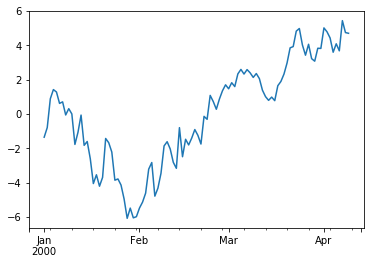

In [88]:
ts = pd.Series(np.random.randn(100), index=pd.date_range('1/1/2000', periods=100))
ts = ts.cumsum()
ts.plot()

<Figure size 432x288 with 0 Axes>

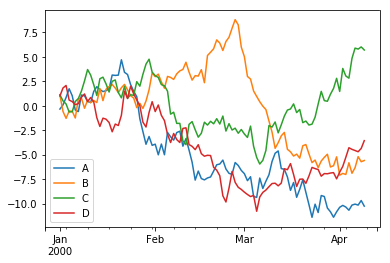

In [95]:


df = pd.DataFrame(np.random.randn(100, 4), index=ts.index,
                  columns=['A', 'B', 'C', 'D'])

df = df.cumsum()

plt.figure(); df.plot(); plt.legend(loc='best')

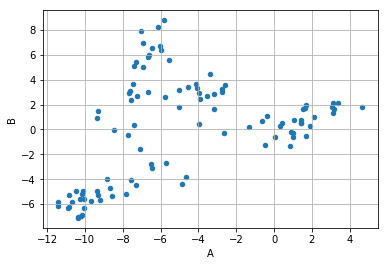

In [97]:
df.plot(kind='scatter', x='A', y='B', grid=True)

In [99]:
!curl -L -o goog.csv http://tinyurl.com/rces-goog
!curl -L -o aapl.csv http://tinyurl.com/rces-aapl-csv
! head goog.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  1103  100  1103    0     0   1288      0 --:--:-- --:--:-- --:--:--     0
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  1103  100  1103    0     0   1014      0  0:00:01  0:00:01 --:--:--     0
<html><head><meta http-equiv="content-type" content="text/html; charset=utf-8"/><title>Sorry...</title><style> body { font-family: verdana, arial, sans-serif; background-color: #fff; color: #000; }</style></head><body><div><table><tr><td><b><font face=sans-serif size=10><font color=#4285f4>G</font><font color=#ea4335>o</font><font color=#fbbc05>o</font><font color=#

,arial,"sans-serif; background-color: #fff; color: #000; }</style></head><body><div><table><tr><td><b><font face=sans-serif size=10><font color=#4285f4>G</font><font color=#ea4335>o</font><font color=#fbbc05>o</font><font color=#4285f4>g</font><font color=#34a853>l</font><font color=#ea4335>e</font></font></b></td><td style=""text-align: left; vertical-align: bottom; padding-bottom: 15px; width: 50%""><div style=""border-bottom: 1px solid #dfdfdf;"">Sorry...</div></td></tr></table></div><div style=""margin-left: 4em;""><h1>We're sorry...</h1><p>... but your computer or network may be sending automated queries. To protect our users","we can't process your request right now.</p></div><div style=""margin-left: 4em;"">See <a href=""https://support.google.com/websearch/answer/86640"">Google Help</a> for more information.<br/><br/></div><div style=""text-align: center; border-top: 1px solid #dfdfdf;""><a href=""https://www.google.com"">Google Home</a></div></body></html>"
"<html><head><meta http-equiv=""content-type"" content=""text/html; charset=utf-8""/><title>Sorry...</title><style> body { font-family: verdana",,,
